### 참고사이트 -> https://kaggle-kr.tistory.com/17

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고,
# 각 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 데이터분석의 일반적인 진행과정 ###

1. 데이터셋 확인 
    - null data 확인 및 수정
2. 탐색적 데이터 분석(exploratory data analysis)
    - 여러 feature들의 개별적으로 분석하고, feature들간의 상관관계를 확인
    - 시각화 툴을 이용한 insight 탐색
3. feature engineering
    - 모델의 성능을 높일 수 있도록 feature 들을 engineering
    - one-hot encoding, class로 나누기, 구간으로 나누기, 텍스트 데이터 처리 등
4. model 만들기
    - sklearn 을 사용해 모델 생성
    - 딥러닝을 위해 tensorflow, pytorch 등 이용가능
5. 모델 학습 및 예측
    - trainset을 이용한 모델학습 및 testset에 대한 prediction
6. 모델 평가
    - 예측 성능이 원하는 수준인지 판단
    - 문제에 따라 모델을 평가하는 방식이 다양

In [2]:
df_train = pd.read_csv('../Data/Titanic/train.csv')
df_test = pd.read_csv('../Data/Titanic/test.csv')

In [3]:
df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### 변수(feature, variable)	정의	                          설명	                                                                                          타입
-   Survived	           생존여부	              target label 임. 1, 0 으로 표현  	                          integer
-   Pclass	               티켓의 클래스	         1 = 1st, 2 = 2nd, 3 = 3rd 클래스로 나뉘며 categorical feature	integer
-   Sex	                   성별	               male, female 로 구분되며 binary	                           string
-   Age	                   나이	               continuous	                                             integer
-   SibSp	               동승한 형제와 배우자의 수  quantitative	                                             integer
-   Parch	               동승한 부모와 아이의 수   quantitative	                                              integer
-   Ticket	               티켓 번호	          alphabat + integer	                                    string
-   Fare	               탑승료	              continuous	                                             float
-   Cabin	               객실 번호	          alphabat + integer	                                     string
-   Embarked	           탑승 항구	          C = Cherbourg, Q = Queenstown, S = Southampton	         string

In [4]:
df_train.describe()   # 각 feature들과 관련된 통계치를 보여줌 (결측치도 확인 가능)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Null Data의 시각화 ###

In [5]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df_train['Age'].isnull().sum()

177

In [8]:
df_train['Age'].shape

(891,)

In [9]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


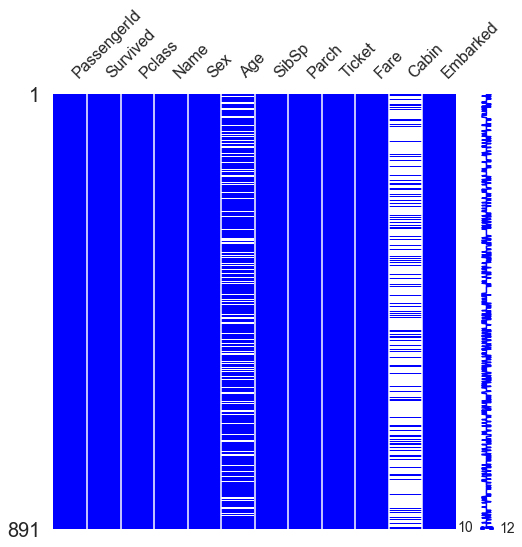

In [10]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.0, 0.0, 1.0))

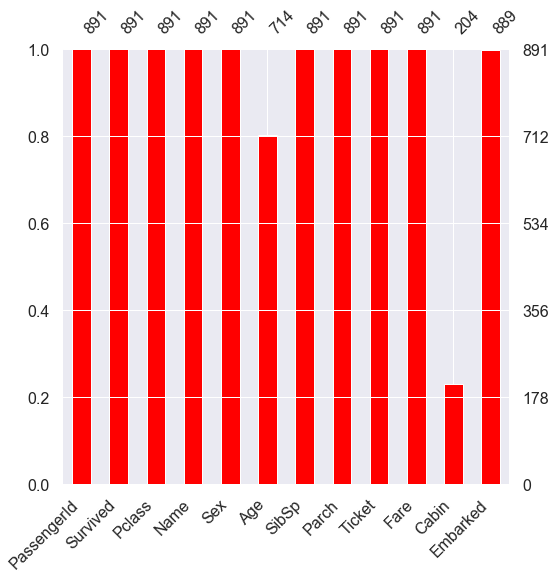

In [11]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(1.0, 0.0, 0.0))

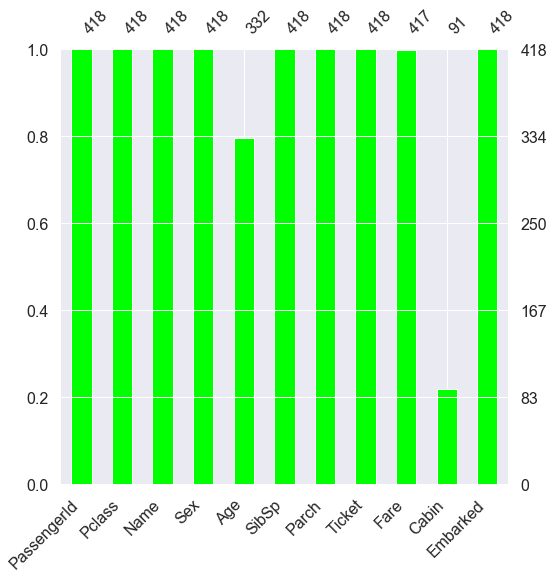

In [12]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.0, 1.0, 0.0))

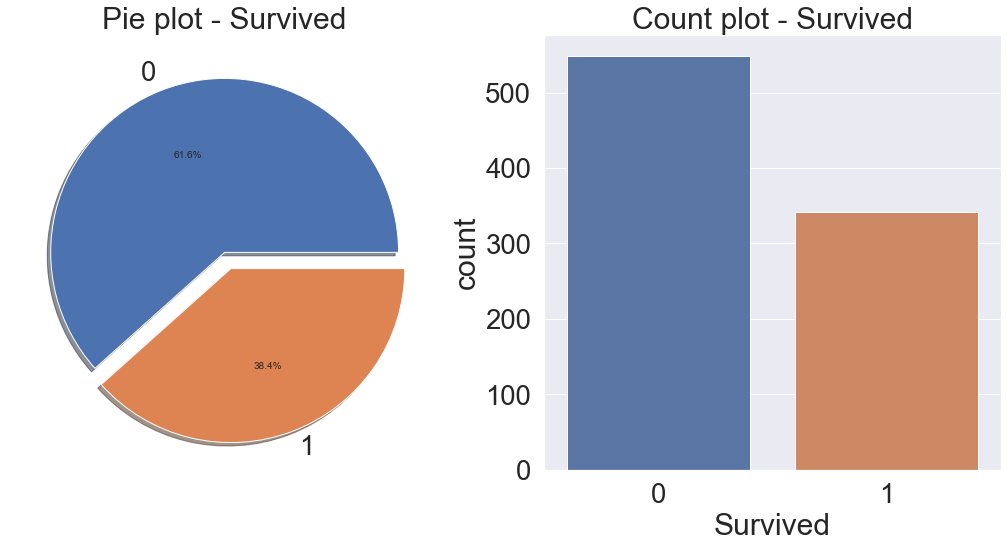

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))   # f는 그래프 자체, ax 는 각 그래프에 대한 정보 배열

# Series에 대해 pie plot 그리기
df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

# seaborn을 이용해 bar plot으로 표현하기
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

In [14]:
df_train['Survived'].value_counts()   # Survived Series에 대한 메소드

0    549
1    342
Name: Survived, dtype: int64

- target label 의 분포가 비교적 균일(balanced)함을 알 수 있다.
- 불균일한 경우, 예를 들어서 100중 1이 99, 0이 1개인 경우에는 만약 모델이 모든것을 1이라 해도 정확도가 99%가 나오게 되므로 0의 예측이 어렵다.

### 먼저 Pclass 에 따른 생존률의 차이를 살펴본다.

In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()   # 각 클래스별 사람수

,Survived
Pclass,
1,216
2,184
3,491


In [16]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()   # 각 클래스별 생존자 수

,Survived
Pclass,
1,136
2,87
3,119


In [17]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


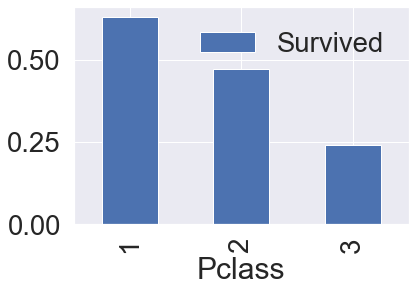

In [19]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

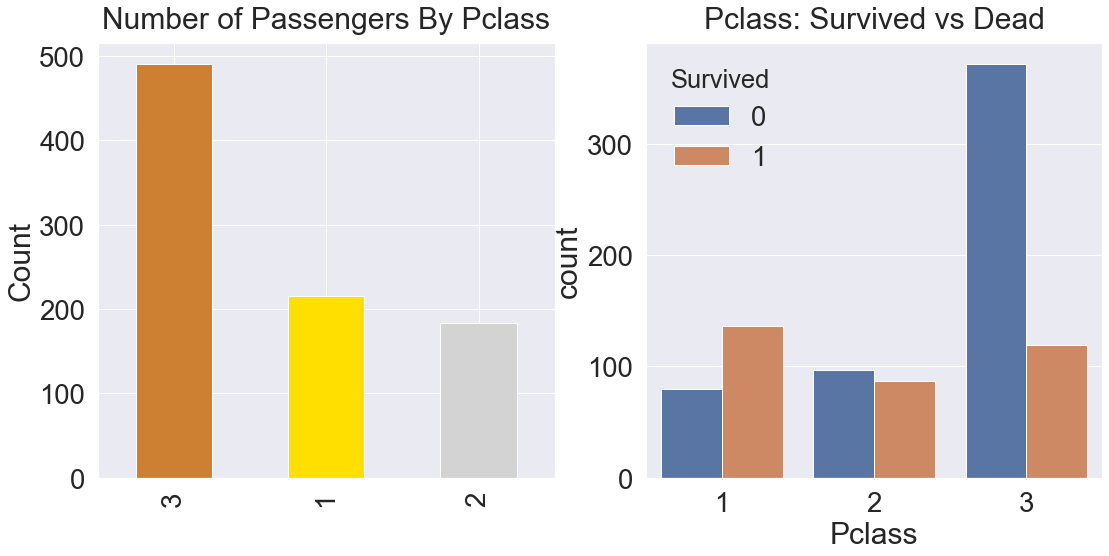

In [20]:
# seaborn 의 countplot 을 이용하면, 특정 label 에 따른 개수를 확인가능
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))   # f는 그래프 자체, ax 는 각 그래프에 대한 정보 배열

# 각 클래스별 승객 수
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

# seaborn을 이용한 각 클래스별 생존자수, 사망자수 비교
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)

plt.show()

- 클래스가 높을 수록, 생존 확률이 높은걸 확인
- 생존에 Pclass가 큰 영향을 미친다고 생각되므로 모델을 만들때 이를 참조

### Sex 에 따른 생존률의 차이

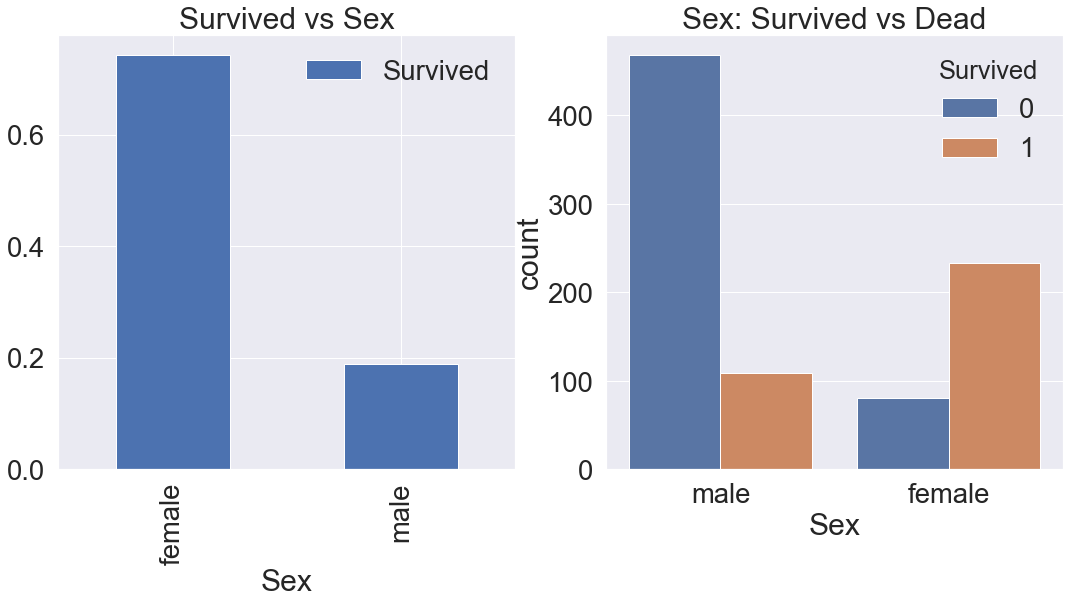

In [21]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

In [22]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by="Survived", ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [23]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Sex 도 예측 모델에 쓰일 중요한 feature 임을 알 수 있습니다

### Pclass와 Sex를 동시에 고려

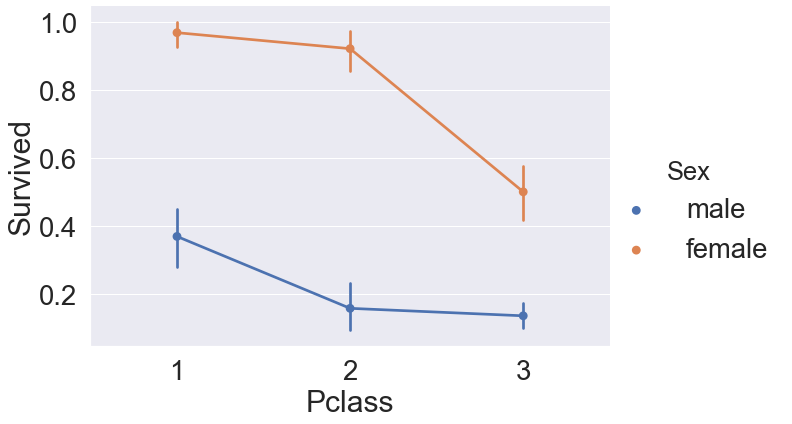

In [24]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

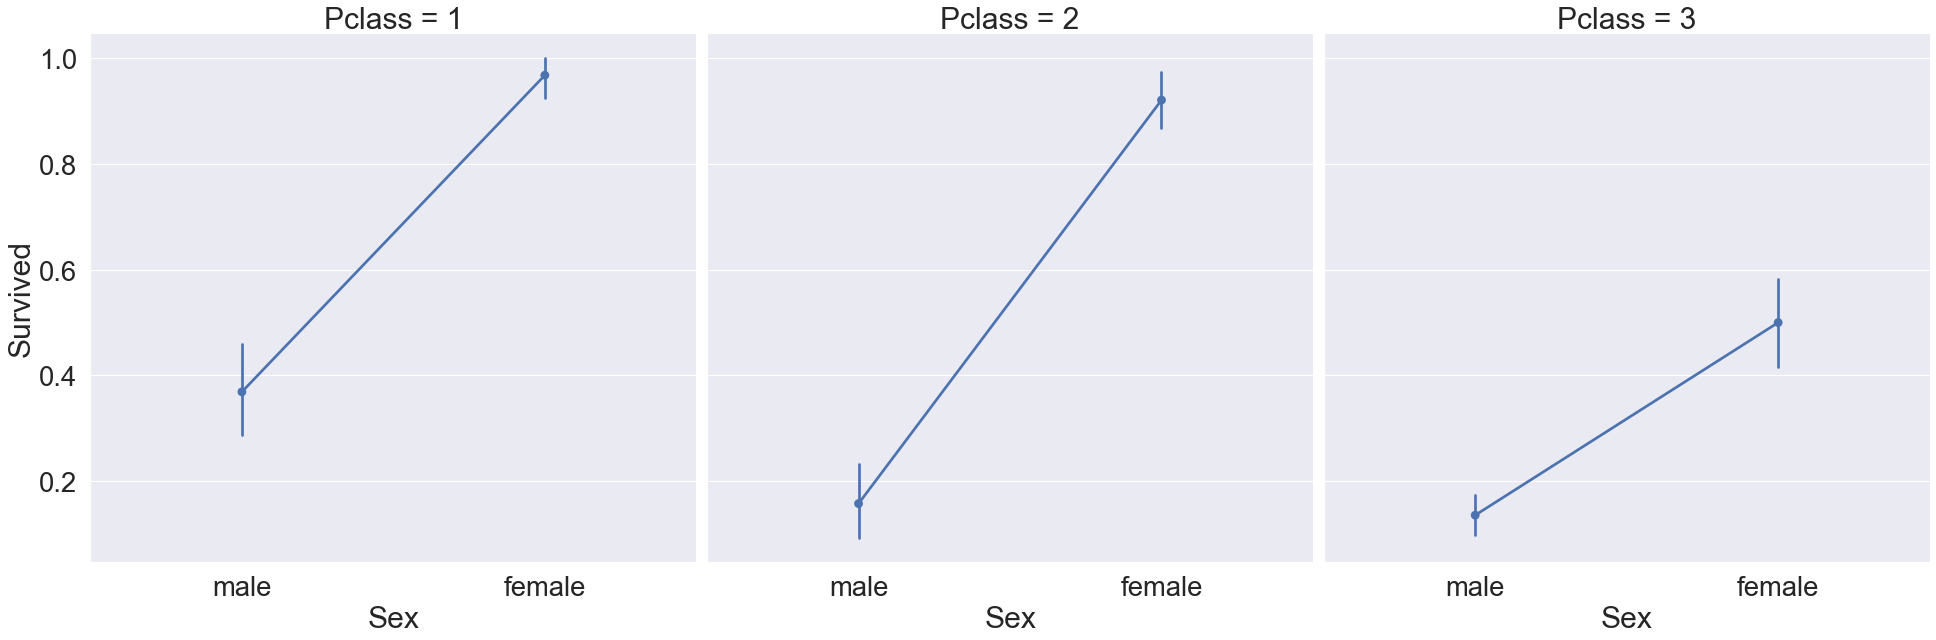

In [25]:
sns.factorplot(x='Sex', y='Survived', col='Pclass',
              data=df_train, saturation=.5,
              size=9, aspect=1
              )

### Age에 따른 생존율

In [26]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


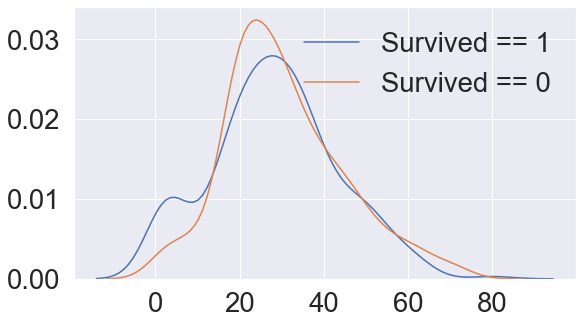

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

# seaborn을 이용한 kernel density distribution 생성방법
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'].dropna(), ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'].dropna(), ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 생존자 중 나이가 어린 경우가 많음

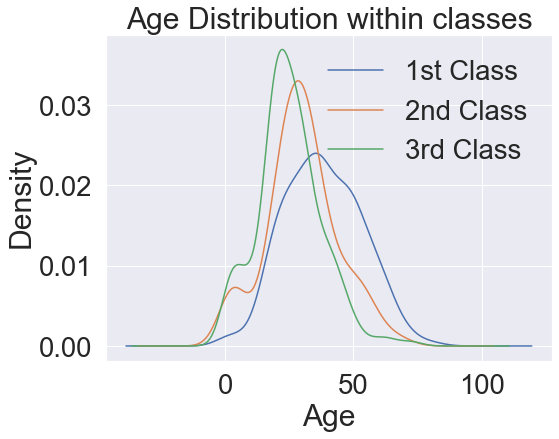

In [28]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

- Class 가 높을 수록 나이 많은 사람의 생존율이 높아짐

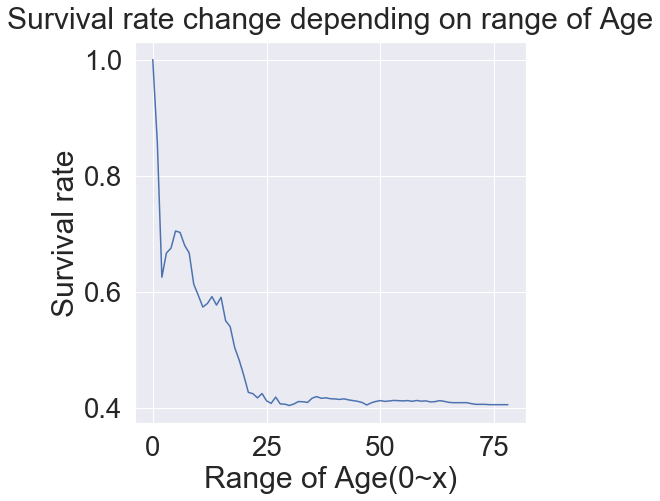

In [29]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

# python 리스트와 matplotlib를 이용한 전형적인 그래프 생성 방법
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 나이가 어릴 수록 생존률이 확실히 높은것을 확인

### seaborn violinplot
- Sex, Pclass, Age, Survived 모두를 동시에 고려

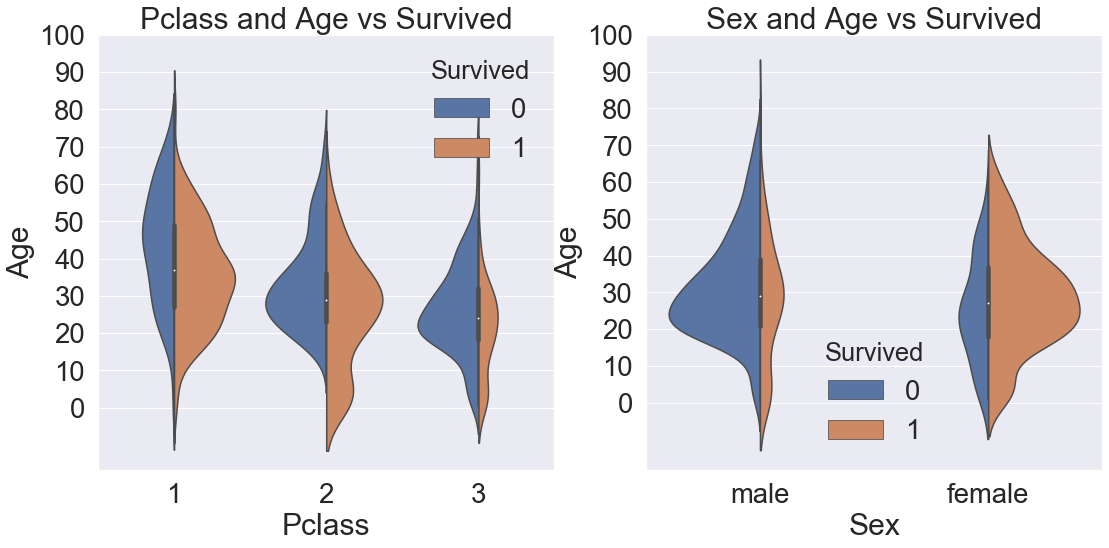

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,8))

sns.violinplot("Pclass","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))   # 축의 눈금 정의

sns.violinplot("Sex","Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))   # 축의 눈금 정의

plt.show()

### 탑승한 항구(Embarked)에 따른 생존율

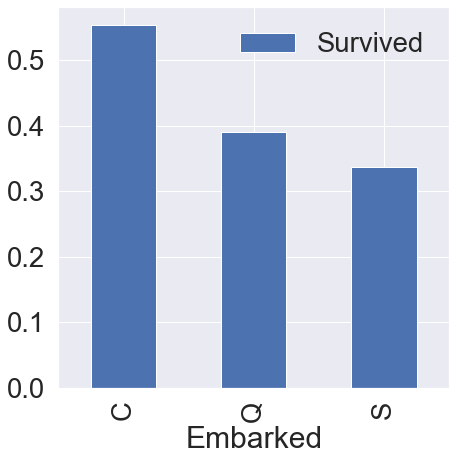

In [31]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [32]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


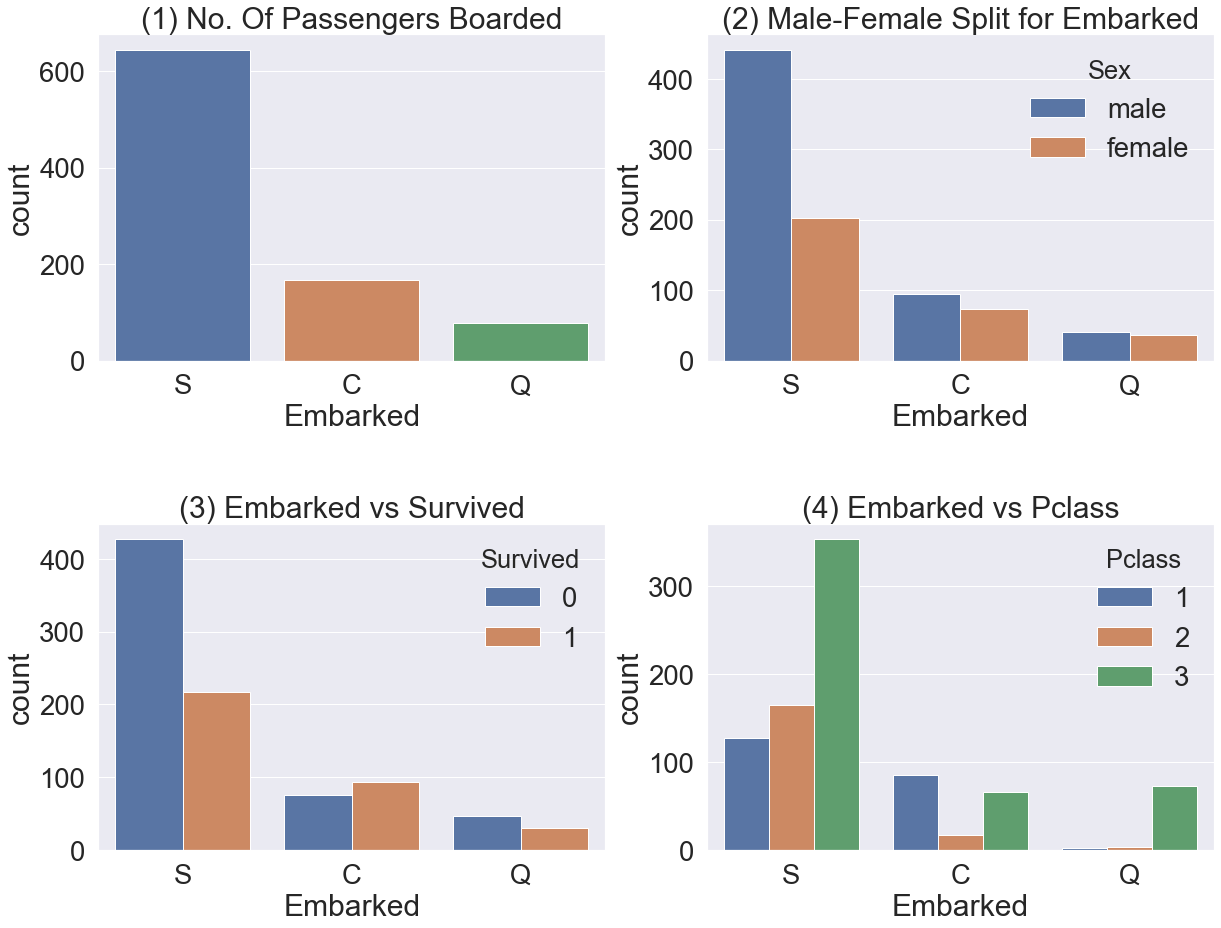

In [33]:
f,ax=plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- S 에서 가장 많은 사람이 탑승함
- C와 Q 는 남녀의 비율이 비슷하고, S는 남자가 더 많음
- 생존확률이 S 경우 많이 낮음
- Class 로 split 해서 보니, C가 생존확률이 높은 이유는 클래스가 많이 탔기 때문
- S는 3rd class 가 많아서 생존확률이 낮음

### SibSp 와 Parch 에 따른 생존율

In [34]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

- 형제자매 + 배우자 + 부모 + 자녀 를 모두 합쳐서 하나의 Feature로 관리함

In [35]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


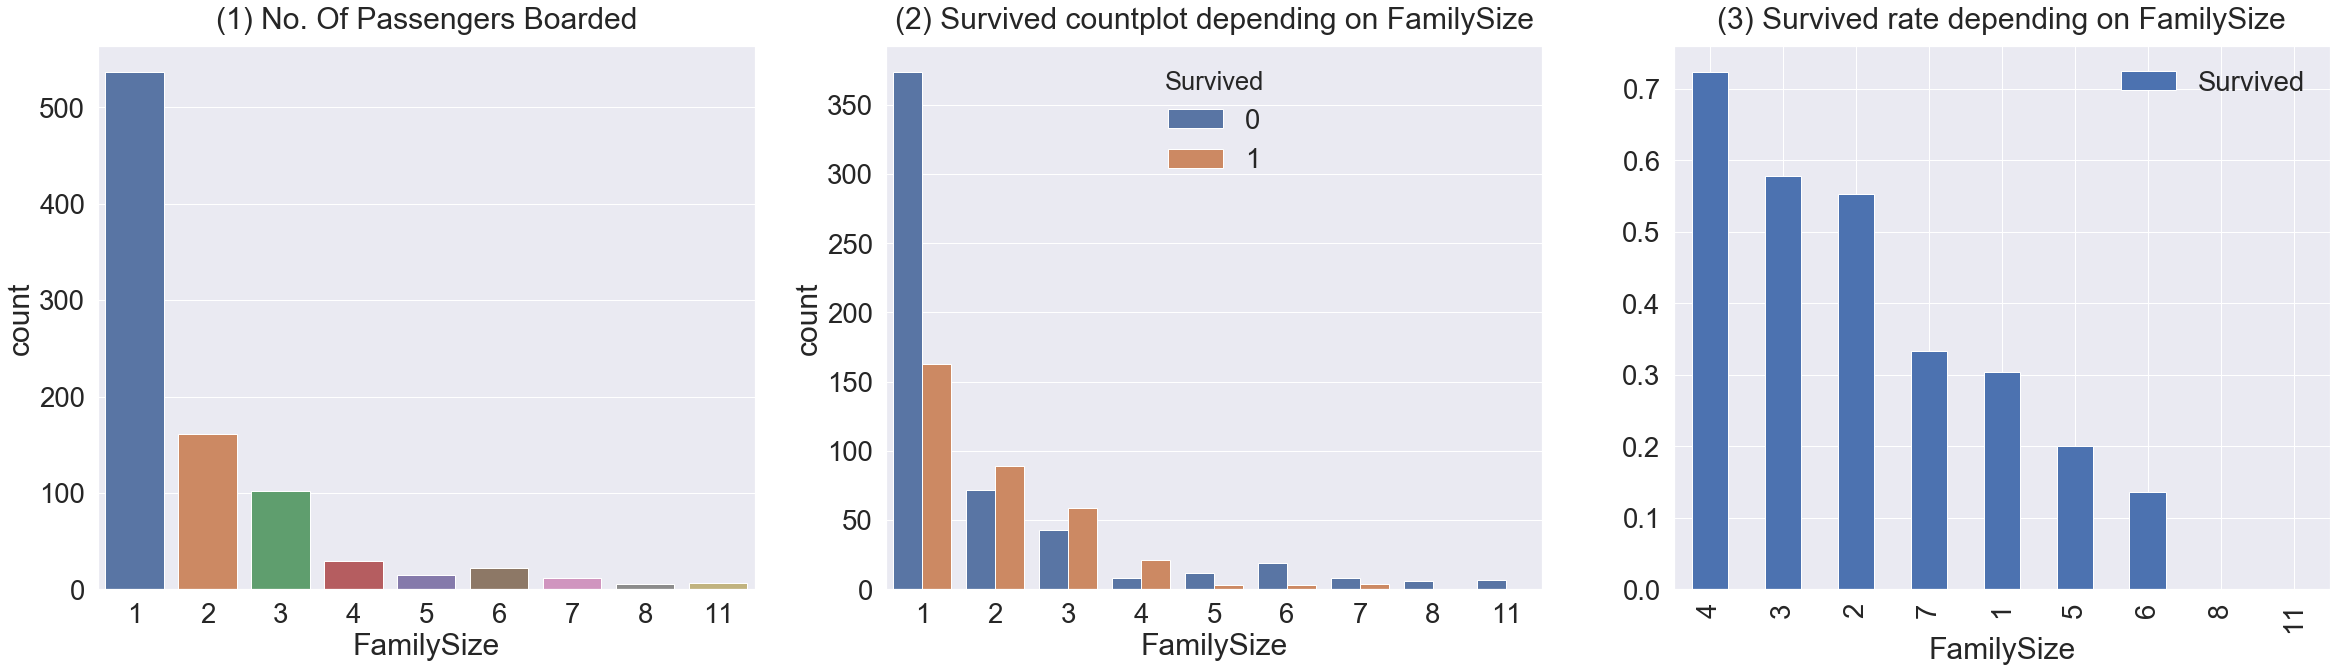

In [36]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 가족이 4명인 경우가 가장 생존확률이 높음
- 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아짐
- 가족수가 너무 작거나(1) 혹은 너무 크면(5, 6, 8, 11) 생존 확률이 작으며, 3~4명 선에서 생존확률이 높은 걸 확인

### Fare 에 따른 생존율

- Fare의 경우 float 자료형이며, 다른 Feature들보다 scale이 큰 값이 존재한다.
- 이런 경우 학습이 잘 되지 않는 경우가 있으므로 log함수로 그 scale을 조정해준다. (일종의 batch normalization)

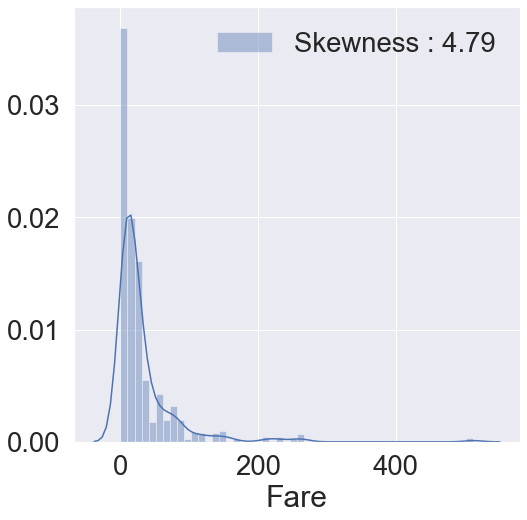

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# 히스토그램 그리는법
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- distribution이 매우 비대칭임 (high skewness)
- 이대로는 모델이 잘못 학습할 수 있음 (몇개 없는 outlier에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과가 나옴)

In [38]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
# Fare 컬럼의 모든 값이 log함수를 적용함

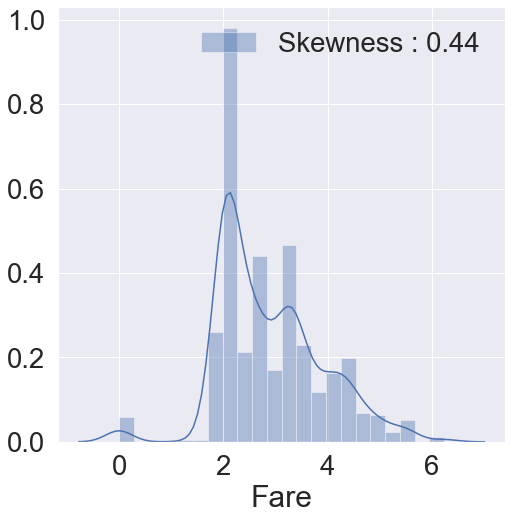

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 비대칭성이 많이 사라짐
- 모델을 학습시키고 그 성능을 높이기 위해 feature에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering이라고 함

### Cabin에 따른 생존율

- 결측치가 많으므로 아예 컬럼을 제거함

### Ticket 에 따른 생존율

- 일단 생략